<a href="https://colab.research.google.com/github/RickyF404/Tesi/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import gdown

In [4]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

Downloading...
From: https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o
To: /content/data_no_temperature.csv
100%|██████████| 1.44M/1.44M [00:00<00:00, 15.0MB/s]
Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 16.0MB/s]


'data_temperature.csv'

# Primo esperimento

Tutti i dati (1 gennaio 2024 - 31 agosto 2025)

In [5]:
df = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
X = df[features].copy()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

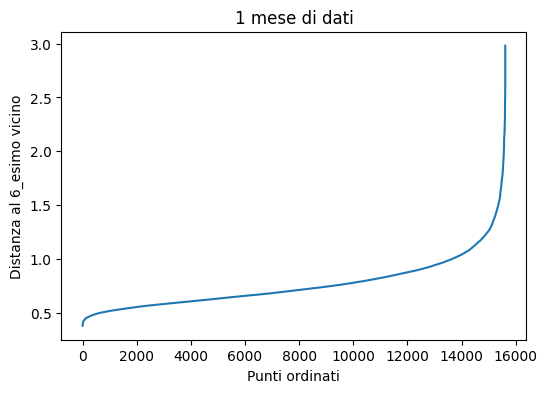

In [ ]:
#Stima di eps
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 6
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

dists = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(dists)

plt.xlabel("Punti ordinati")
plt.ylabel(f"Distanza al {k}_esimo vicino")
plt.title("1 mese di dati")
plt.show()

In [ ]:
db = DBSCAN(eps=1.25, min_samples=6)
labels = db.fit_predict(X_scaled)

In [ ]:
unique, counts = np.unique(labels, return_counts = True)
print(dict(zip(unique, counts)))
print("percentuale: ", (282/(282+15332))*100)

{np.int64(-1): np.int64(282), np.int64(0): np.int64(15332)}
percentuale:  1.8060714743179198


Un mese di dati (1 gennaio 2024 - 31 gennaio 2024)

In [6]:
df = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df_1month = df[
    (df["timestamp"].dt.month == 1) &
    (df["timestamp"].dt.year == 2024)
].copy()

features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
X_1month = df_1month[features].copy()

scaler = StandardScaler()
X_scaled_1month = scaler.fit_transform(X_1month)

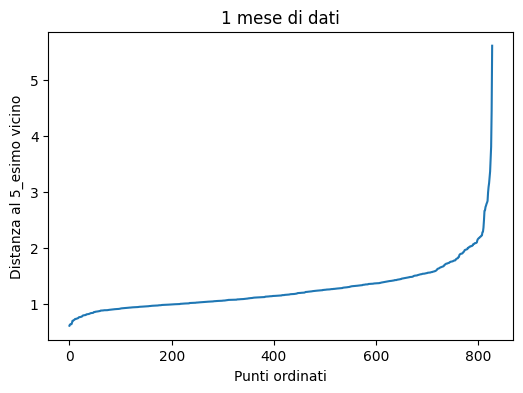

In [ ]:
#Stima di eps
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled_1month)
distances, indices = neigh.kneighbors(X_scaled_1month)

dists = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(dists)

plt.xlabel("Punti ordinati")
plt.ylabel(f"Distanza al {k}_esimo vicino")
plt.title("1 mese di dati")
plt.show()

In [ ]:
db = DBSCAN(eps=1.75, min_samples=5)
labels_1month = db.fit_predict(X_scaled_1month)

unique_1month, counts_1month = np.unique(labels_1month, return_counts = True)
print(dict(zip(unique_1month, counts_1month)))
print("percentuale: ", (38/(49+790))*100)

{np.int64(-1): np.int64(38), np.int64(0): np.int64(790)}
percentuale:  4.529201430274136


Due mesi di dati (1 gennaio 2024 - 28 febbraio 2024)

In [7]:
df = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df["timestamp"] = pd.to_datetime(df["timestamp"])

start_date = "2024-01-01"
end_date = "2024-03-01"
df_2months = df[(df["timestamp"] >= start_date) & (df["timestamp"] < end_date)].copy()

features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
X_2months = df_2months[features].copy()

scaler = StandardScaler()
X_scaled_2months = scaler.fit_transform(X_2months)

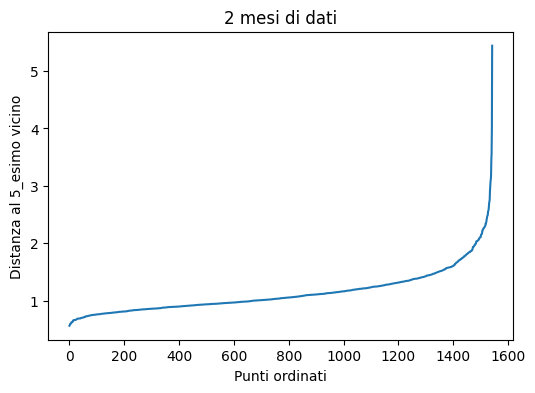

In [ ]:
#Stima di eps
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled_2months)
distances, indices = neigh.kneighbors(X_scaled_2months)

dists = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(dists)

plt.xlabel("Punti ordinati")
plt.ylabel(f"Distanza al {k}_esimo vicino")
plt.title("2 mesi di dati")
plt.show()

In [ ]:
db = DBSCAN(eps=1.75, min_samples=5)
labels_2months = db.fit_predict(X_scaled_2months)

unique, counts = np.unique(labels_2months, return_counts = True)
print(dict(zip(unique, counts)))
print("percentuale: ", (51/(51+1492))*100)

{np.int64(-1): np.int64(51), np.int64(0): np.int64(1492)}
percentuale:  3.3052495139338953


Tre mesi di dati (1 gennaio 2024 - 31 marzo 2024)

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df["timestamp"] = pd.to_datetime(df["timestamp"])

start_date = "2024-01-01"
end_date = "2024-04-01"
df_3months = df[(df["timestamp"] >= start_date) & (df["timestamp"] < end_date)].copy()

features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
X_3months = df_3months[features].copy()

scaler = StandardScaler()
X_scaled_3months = scaler.fit_transform(X_3months)

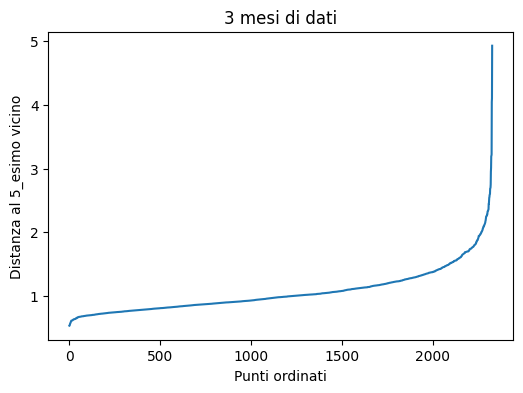

In [ ]:
#Stima di eps
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled_3months)
distances, indices = neigh.kneighbors(X_scaled_3months)

dists = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(dists)

plt.xlabel("Punti ordinati")
plt.ylabel(f"Distanza al {k}_esimo vicino")
plt.title("3 mesi di dati")
plt.show()

In [ ]:
db = DBSCAN(eps=1.75, min_samples=5)
labels_3months = db.fit_predict(X_scaled_3months)

unique, counts = np.unique(labels_3months, return_counts = True)
print(dict(zip(unique, counts)))
print("percentuale: ", (53/(53+2274))*100)

{np.int64(-1): np.int64(53), np.int64(0): np.int64(2274)}
percentuale:  2.2776106574989257


 4 mesi di dati (1 gennaio 2024 - 30 aprile 2024)

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df["timestamp"] = pd.to_datetime(df["timestamp"])

start_date = "2024-01-01"
end_date = "2024-05-01"
df_4months = df[(df["timestamp"] >= start_date) & (df["timestamp"] < end_date)].copy()

features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
X_4months = df_4months[features].copy()

scaler = StandardScaler()
X_scaled_4months = scaler.fit_transform(X_4months)

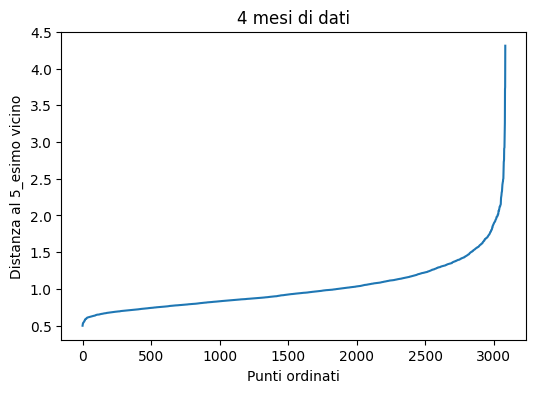

In [ ]:
#Stima di eps
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled_4months)
distances, indices = neigh.kneighbors(X_scaled_4months)

dists = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(dists)

plt.xlabel("Punti ordinati")
plt.ylabel(f"Distanza al {k}_esimo vicino")
plt.title("4 mesi di dati")
plt.show()

In [ ]:
db = DBSCAN(eps=1.75, min_samples=5)
labels_4months = db.fit_predict(X_scaled_4months)

unique, counts = np.unique(labels_4months, return_counts = True)
print(dict(zip(unique, counts)))
print("percentuale: ", (57/(57+3029))*100)

{np.int64(-1): np.int64(57), np.int64(0): np.int64(3029)}
percentuale:  1.8470511989630591


 5 mesi di dati (1 gennaio 2024 - 31 maggio 2024)

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df["timestamp"] = pd.to_datetime(df["timestamp"])

start_date = "2024-01-01"
end_date = "2024-06-01"
df_5months = df[(df["timestamp"] >= start_date) & (df["timestamp"] < end_date)].copy()

features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
X_5months = df_5months[features].copy()

scaler = StandardScaler()
X_scaled_5months = scaler.fit_transform(X_5months)

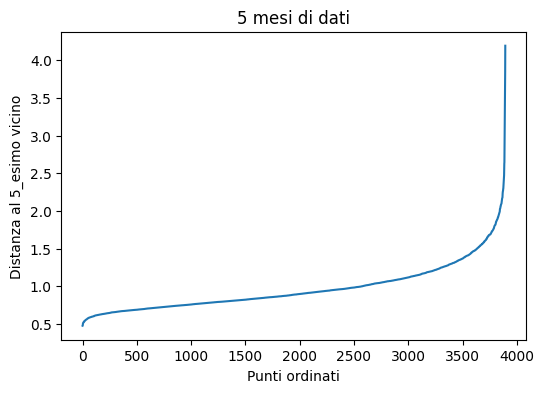

In [ ]:
#Stima di eps
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled_5months)
distances, indices = neigh.kneighbors(X_scaled_5months)

dists = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(dists)

plt.xlabel("Punti ordinati")
plt.ylabel(f"Distanza al {k}_esimo vicino")
plt.title("5 mesi di dati")
plt.show()

In [ ]:
db = DBSCAN(eps=1.62, min_samples=5)
labels_5months = db.fit_predict(X_scaled_5months)

unique, counts = np.unique(labels_5months, return_counts = True)
print(dict(zip(unique, counts)))
print("percentuale: ", (72/(72+3823))*100)

{np.int64(-1): np.int64(72), np.int64(0): np.int64(3823)}
percentuale:  1.848523748395379


4 mesi di dati (1 giugno 2024 - 30 settembre 2024)

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df["timestamp"] = pd.to_datetime(df["timestamp"])

start_date = "2024-06-01"
end_date = "2024-10-01"
df_4months = df[(df["timestamp"] >= start_date) & (df["timestamp"] < end_date)].copy()

features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
X_4months = df_4months[features].copy()

scaler = StandardScaler()
X_scaled_4months = scaler.fit_transform(X_4months)

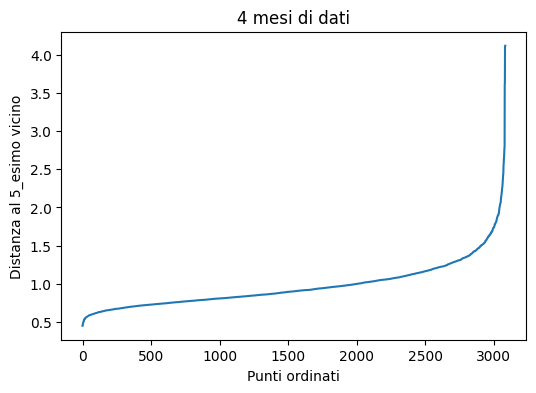

In [ ]:
#Stima di eps
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled_4months)
distances, indices = neigh.kneighbors(X_scaled_4months)

dists = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(dists)

plt.xlabel("Punti ordinati")
plt.ylabel(f"Distanza al {k}_esimo vicino")
plt.title("4 mesi di dati")
plt.show()

In [ ]:
db = DBSCAN(eps=1.62, min_samples=5)
labels_4months = db.fit_predict(X_scaled_4months)

unique, counts = np.unique(labels_4months, return_counts = True)
print(dict(zip(unique, counts)))
print("percentuale: ", (52/(52+3033))*100)

{np.int64(-1): np.int64(52), np.int64(0): np.int64(3033)}
percentuale:  1.6855753646677474


# DBSCAN con training set e validation set

In [ ]:
def compute_eps(X_train, min_samples=5, percentile=95):
  #calcola le distanze dai min_samples-esimi vicini
  nn = NearestNeighbors(n_neighbors=min_samples)
  nn.fit(X_train)
  distances, _ = nn.kneighbors(X_train)

  #prendiamo solo la distanza dal min_samples-esimo vicino
  kth_distances = distances[:, -1]

  #scegliamo eps come percentile delle distanze
  eps = np.percentile(kth_distances, percentile)
  return eps

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")

df["month"] = df["timestamp"].dt.to_period("M")

cols_features = [c for c in df.columns if c not in ("timestamp", "month")]

#Normalizzazione
X = StandardScaler().fit_transform(df[cols_features])


#training su mesi consecutivi
months = sorted(df["month"].unique())

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  X_train = X[df["month"].isin(train_months)]
  X_val = X[df["month"].isin(val_months)]

  if len(X_train) == 0 or len(X_val) == 0:
    continue

  eps = compute_eps(X_train, min_samples=5, percentile=99)
  min_samples = 5
  db = DBSCAN(eps = eps, min_samples=min_samples)
  y_train = db.fit_predict(X_train)

  if len(db.core_sample_indices_) == 0:
    continue

  n_clusters = len(set(y_train)) - (1 if -1 in y_train else 0)
  print(f"\n Training mesi: {i}, eps: {eps:.3f}, n_clusters trovati: {n_clusters}, outliers: {np.mean(y_train==-1):.2%}")

  core_points = X_train[db.core_sample_indices_]

#Nearest Neighbors
  nn = NearestNeighbors(radius = eps)
  nn.fit(core_points)

  neighbors_count = np.array([len(nn.radius_neighbors([x], return_distance=False)[0]) for x in X_val])
  y_val = np.where(neighbors_count >= min_samples, 1, -1)

  anomaly_rate = np.mean(y_val == -1)
  print(f"Mesi di training: {i}, Anomaly Rate: {anomaly_rate:.2%}")



#training su mesi stagionali sparsi
print("\n", "\n", "\n")
seasonal_months = [
    pd.Period("2024-01", freq="M"),
    pd.Period("2024-04", freq="M"),
    pd.Period("2024-07", freq="M"),
    pd.Period("2024-10", freq="M")
]

print(seasonal_months)
for k in range(1, len(seasonal_months)+1):
  train_months = seasonal_months[:k]
  val_months = [m for m in months if m not in train_months]

  X_train = X[df["month"].isin(train_months)]
  X_val = X[df["month"].isin(val_months)]

  if len(X_train) == 0 or len(X_val) == 0:
    continue

  eps = compute_eps(X_train, min_samples=5, percentile=99)
  min_samples = 5
  db = DBSCAN(eps = eps, min_samples=min_samples)
  y_train = db.fit_predict(X_train)

  if len(db.core_sample_indices_) == 0:
    continue

  n_clusters = len(set(y_train)) - (1 if -1 in y_train else 0)
  print(f"\n eps: {eps:.3f}, n_clusters trovati: {n_clusters}, outliers: {np.mean(y_train==-1):.2%}")

  core_points = X_train[db.core_sample_indices_]

#Nearest Neighbors
  nn = NearestNeighbors(radius = eps)
  nn.fit(core_points)

  neighbors_count = np.array([len(nn.radius_neighbors([x], return_distance=False)[0]) for x in X_val])
  y_val = np.where(neighbors_count >= min_samples, 1, -1)

  anomaly_rate = np.mean(y_val == -1)
  print(f"Anomaly Rate: {anomaly_rate:.2%}")

/tmp/ipython-input-3856812004.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")



 Training mesi: 1, eps: 2.268, n_clusters trovati: 1, outliers: 0.48%
Mesi di training: 1, Anomaly Rate: 15.61%

 Training mesi: 2, eps: 1.985, n_clusters trovati: 1, outliers: 0.52%
Mesi di training: 2, Anomaly Rate: 21.34%

 Training mesi: 3, eps: 1.877, n_clusters trovati: 1, outliers: 0.30%
Mesi di training: 3, Anomaly Rate: 22.66%

 Training mesi: 4, eps: 1.876, n_clusters trovati: 1, outliers: 0.32%
Mesi di training: 4, Anomaly Rate: 14.79%

 Training mesi: 5, eps: 1.801, n_clusters trovati: 1, outliers: 0.33%
Mesi di training: 5, Anomaly Rate: 8.76%

 Training mesi: 6, eps: 1.792, n_clusters trovati: 1, outliers: 0.36%
Mesi di training: 6, Anomaly Rate: 5.35%

 Training mesi: 7, eps: 1.768, n_clusters trovati: 1, outliers: 0.33%
Mesi di training: 7, Anomaly Rate: 3.70%

 Training mesi: 8, eps: 1.776, n_clusters trovati: 1, outliers: 0.39%
Mesi di training: 8, Anomaly Rate: 1.87%

 Training mesi: 9, eps: 1.761, n_clusters trovati: 1, outliers: 0.43%
Mesi di training: 9, Anomaly 

In [ ]:
def compute_eps_mean_std(X_train, min_samples=5, alpha=1.5):
  #calcola le distanze dai min_samples-esimi vicini
  nn = NearestNeighbors(n_neighbors=min_samples)
  nn.fit(X_train)
  distances, _ = nn.kneighbors(X_train)

  #prendiamo solo la distanza dal min_samples-esimo vicino
  kth_distances = distances[:, -1]

  mean = np.mean(kth_distances)
  std = np.std(kth_distances)

  eps = mean + alpha * std
  return float(eps)

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")

df["month"] = df["timestamp"].dt.to_period("M")

cols_features = [c for c in df.columns if c not in ("timestamp", "month")]

#Normalizzazione
X = StandardScaler().fit_transform(df[cols_features])

months = sorted(df["month"].unique())

results = []

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  X_train = X[df["month"].isin(train_months)]
  X_val = X[df["month"].isin(val_months)]

  if len(X_train) == 0 or len(X_val) == 0:
    continue

  eps = compute_eps_mean_std(X_train, min_samples=5, alpha = 3.0)
  min_samples = 5
  db = DBSCAN(eps = eps, min_samples=min_samples)
  y_train = db.fit_predict(X_train)

  if len(db.core_sample_indices_) == 0:
    continue

  core_points = X_train[db.core_sample_indices_]

#Nearest Neighbors
  nn = NearestNeighbors(radius = eps)
  nn.fit(core_points)

  neighbors_count = np.array([len(nn.radius_neighbors([x], return_distance=False)[0]) for x in X_val])
  y_val = np.where(neighbors_count >= min_samples, 1, -1)

  anomaly_rate = np.mean(y_val == -1)
  results.append((i, anomaly_rate))
  print(f"Mesi di training: {i}, Anomaly Rate: {anomaly_rate:.2%}")

results_df = pd.DataFrame(results, columns=["n_mesi_train", "anomaly_rate"])
print("\n--- Risultati finali ---")
print(results_df)

/tmp/ipython-input-2989726267.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")


Mesi di training: 1, Anomaly Rate: 23.22%
Mesi di training: 2, Anomaly Rate: 26.03%
Mesi di training: 3, Anomaly Rate: 29.31%
Mesi di training: 4, Anomaly Rate: 21.78%
Mesi di training: 5, Anomaly Rate: 12.27%
Mesi di training: 6, Anomaly Rate: 7.99%
Mesi di training: 7, Anomaly Rate: 5.53%
Mesi di training: 8, Anomaly Rate: 2.88%
Mesi di training: 9, Anomaly Rate: 2.48%
Mesi di training: 10, Anomaly Rate: 2.69%
Mesi di training: 11, Anomaly Rate: 2.75%
Mesi di training: 12, Anomaly Rate: 2.80%
Mesi di training: 13, Anomaly Rate: 2.88%
Mesi di training: 14, Anomaly Rate: 2.75%
Mesi di training: 15, Anomaly Rate: 3.20%
Mesi di training: 16, Anomaly Rate: 3.52%
Mesi di training: 17, Anomaly Rate: 4.21%
Mesi di training: 18, Anomaly Rate: 5.02%
Mesi di training: 19, Anomaly Rate: 3.83%

--- Risultati finali ---
    n_mesi_train  anomaly_rate
0              1      0.232179
1              2      0.260323
2              3      0.293144
3              4      0.217832
4              5      0.1

In [ ]:
df = pd.read_csv("/content/data_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")

df["month"] = df["timestamp"].dt.to_period("M")

cols_features = [c for c in df.columns if c not in ("timestamp", "month")]

#Normalizzazione
X = StandardScaler().fit_transform(df[cols_features])

months = sorted(df["month"].unique())

results = []

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  X_train = X[df["month"].isin(train_months)]
  X_val = X[df["month"].isin(val_months)]

  if len(X_train) == 0 or len(X_val) == 0:
    continue

  eps = compute_eps(X_train, min_samples=5, percentile=99)
  min_samples = 5
  db = DBSCAN(eps = eps, min_samples=min_samples)
  y_train = db.fit_predict(X_train)

  if len(db.core_sample_indices_) == 0:
    continue

  n_clusters = len(set(y_train)) - (1 if -1 in y_train else 0)
  print(f"\n Training mesi: {i}, eps: {eps:.3f}, n_clusters trovati: {n_clusters}, outliers: {np.mean(y_train==-1):.2%}")

  core_points = X_train[db.core_sample_indices_]

#Nearest Neighbors
  nn = NearestNeighbors(radius = eps)
  nn.fit(core_points)

  neighbors_count = np.array([len(nn.radius_neighbors([x], return_distance=False)[0]) for x in X_val])
  y_val = np.where(neighbors_count >= min_samples, 1, -1)

  anomaly_rate = np.mean(y_val == -1)
  results.append((i, anomaly_rate))
  print(f"Mesi di training: {i}, Anomaly Rate: {anomaly_rate:.2%}")




#training su mesi stagionali sparsi
print("\n", "\n", "\n")
seasonal_months = [
    pd.Period("2024-01", freq="M"),
    pd.Period("2024-04", freq="M"),
    pd.Period("2024-07", freq="M"),
    pd.Period("2024-10", freq="M")
]

print(seasonal_months)
for k in range(1, len(seasonal_months)+1):
  train_months = seasonal_months[:k]
  val_months = [m for m in months if m not in train_months]

  X_train = X[df["month"].isin(train_months)]
  X_val = X[df["month"].isin(val_months)]

  if len(X_train) == 0 or len(X_val) == 0:
    continue

  eps = compute_eps(X_train, min_samples=5, percentile=99)
  min_samples = 5
  db = DBSCAN(eps = eps, min_samples=min_samples)
  y_train = db.fit_predict(X_train)

  if len(db.core_sample_indices_) == 0:
    continue

  n_clusters = len(set(y_train)) - (1 if -1 in y_train else 0)
  print(f"\n eps: {eps:.3f}, n_clusters trovati: {n_clusters}, outliers: {np.mean(y_train==-1):.2%}")

  core_points = X_train[db.core_sample_indices_]

#Nearest Neighbors
  nn = NearestNeighbors(radius = eps)
  nn.fit(core_points)

  neighbors_count = np.array([len(nn.radius_neighbors([x], return_distance=False)[0]) for x in X_val])
  y_val = np.where(neighbors_count >= min_samples, 1, -1)

  anomaly_rate = np.mean(y_val == -1)
  print(f"Anomaly Rate: {anomaly_rate:.2%}")

/tmp/ipython-input-712512243.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")



 Training mesi: 1, eps: 2.314, n_clusters trovati: 1, outliers: 0.48%
Mesi di training: 1, Anomaly Rate: 39.21%

 Training mesi: 2, eps: 2.022, n_clusters trovati: 1, outliers: 0.52%
Mesi di training: 2, Anomaly Rate: 46.09%

 Training mesi: 3, eps: 1.900, n_clusters trovati: 1, outliers: 0.34%
Mesi di training: 3, Anomaly Rate: 47.81%

 Training mesi: 4, eps: 1.934, n_clusters trovati: 1, outliers: 0.36%
Mesi di training: 4, Anomaly Rate: 35.19%

 Training mesi: 5, eps: 1.906, n_clusters trovati: 1, outliers: 0.36%
Mesi di training: 5, Anomaly Rate: 17.42%

 Training mesi: 6, eps: 1.910, n_clusters trovati: 1, outliers: 0.39%
Mesi di training: 6, Anomaly Rate: 7.09%

 Training mesi: 7, eps: 1.928, n_clusters trovati: 1, outliers: 0.39%
Mesi di training: 7, Anomaly Rate: 3.80%

 Training mesi: 8, eps: 1.922, n_clusters trovati: 1, outliers: 0.39%
Mesi di training: 8, Anomaly Rate: 2.33%

 Training mesi: 9, eps: 1.928, n_clusters trovati: 1, outliers: 0.39%
Mesi di training: 9, Anomaly

# Finestre Temporali senza temperatura

In [ ]:
df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]

In [ ]:
 def anomaly_rate_DBSCAN(train_df, valid_df, features):
  scaler = StandardScaler()
  # scaler = RobustScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  eps = compute_eps(X_train, min_samples=5, percentile=99)
  min_samples = 5
  db = DBSCAN(eps = eps, min_samples=min_samples)
  y_train = db.fit_predict(X_train)

  # n_clusters = len(set(y_train)) - (1 if -1 in y_train else 0)
  # print(f"\n Training mesi: {i}, eps: {eps:.3f}, n_clusters trovati: {n_clusters}, outliers: {np.mean(y_train==-1):.2%}")

  core_points = X_train[db.core_sample_indices_]

#Nearest Neighbors
  nn = NearestNeighbors(radius = eps)
  nn.fit(core_points)

  neighbors_count = np.array([len(nn.radius_neighbors([x], return_distance=False)[0]) for x in X_val])
  y_val = np.where(neighbors_count >= min_samples, 1, -1)

  anomaly_rate = np.mean(y_val == -1)

  return anomaly_rate

In [ ]:
def create_fake_month(df, frac_per_month, random_state):
  rng = np.random.default_rng(seed=random_state) # generatore casuale con seed
  df["day"] = df["timestamp"].dt.floor("D")
  df["year_month"] = df["timestamp"].dt.to_period("M")
  train_indices = []

  for ym, group in df.groupby("year_month"):
    days = group["day"].unique()
    n_take = max(1, int(len(days) * frac_per_month))
    sampled_days = rng.choice(days, size=n_take, replace=False)
    sel = group[group["day"].isin(sampled_days)].index.tolist()
    train_indices += sel

  train_df = df.loc[train_indices].copy()
  valid_df = df.drop(index=train_indices).copy()
  train_df = train_df.drop(columns=["day", "year_month"])
  valid_df = valid_df.drop(columns=["day", "year_month"])
  train_df = train_df.sort_values("timestamp")
  valid_df = valid_df.sort_values("timestamp")

  return train_df, valid_df

In [ ]:
def compute_eps(X_train, min_samples=5, percentile=95):
  #calcola le distanze dai min_samples-esimi vicini
  nn = NearestNeighbors(n_neighbors=min_samples)
  nn.fit(X_train)
  distances, _ = nn.kneighbors(X_train)

  #prendiamo solo la distanza dal min_samples-esimo vicino
  kth_distances = distances[:, -1]

  #scegliamo eps come percentile delle distanze
  eps = np.percentile(kth_distances, percentile)
  return eps

2 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "anomaly rate": anomaly})

results_df_2m = pd.DataFrame(results)
print(results_df_2m)

          train_months  window_size  anomaly rate
0   [2024-01, 2024-02]            2      0.245478
1   [2024-02, 2024-03]            2      0.320243
2   [2024-03, 2024-04]            2      0.114395
3   [2024-04, 2024-05]            2      0.050096
4   [2024-05, 2024-06]            2      0.036734
5   [2024-06, 2024-07]            2      0.053299
6   [2024-07, 2024-08]            2      0.070294
7   [2024-08, 2024-09]            2      0.101905
8   [2024-09, 2024-10]            2      0.136422
9   [2024-10, 2024-11]            2      0.092026
10  [2024-11, 2024-12]            2      0.050573


4 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "anomaly rate": anomaly})

results_df_4m = pd.DataFrame(results)
print(results_df_4m)

                           train_months  window_size  anomaly rate
0  [2024-01, 2024-02, 2024-03, 2024-04]            4      0.185984
1  [2024-02, 2024-03, 2024-04, 2024-05]            4      0.085362
2  [2024-03, 2024-04, 2024-05, 2024-06]            4      0.039394
3  [2024-04, 2024-05, 2024-06, 2024-07]            4      0.032795
4  [2024-05, 2024-06, 2024-07, 2024-08]            4      0.033402
5  [2024-06, 2024-07, 2024-08, 2024-09]            4      0.062619
6  [2024-07, 2024-08, 2024-09, 2024-10]            4      0.087150
7  [2024-08, 2024-09, 2024-10, 2024-11]            4      0.052556
8  [2024-09, 2024-10, 2024-11, 2024-12]            4      0.025517


6 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "anomaly rate": anomaly})

results_df_6m = pd.DataFrame(results)
print(results_df_6m)

                                        train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   anomaly rate  
0      0.063254  
1      0.037814  
2      0.019815  
3      0.020675  
4      0.041631  
5      0.051819  
6      0.013502  


2 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_2m_fake = []

train_df, valid_df = create_fake_month(df_original, frac_per_month=0.1, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)
results_2m_fake.append({"window_size": 2, "anomaly": anomaly})

results_df_2m_fake = pd.DataFrame(results_2m_fake)
print(results_df_2m_fake)

Giorni training: 57
Giorni validation: 547
   window_size   anomaly
0            2  0.012314


4 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_4m_fake =[]
train_df, valid_df = create_fake_month(df_original, frac_per_month=0.2, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)
results_4m_fake.append({"window_size": 4, "anomaly": anomaly})

results_df_4m_fake = pd.DataFrame(results_4m_fake)
print(results_df_4m_fake)

Giorni training: 117
Giorni validation: 487
   window_size   anomaly
0            4  0.007837


6 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_6m_fake = []
train_df, valid_df = create_fake_month(df_original, frac_per_month=0.3, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)
results_6m_fake.append({"window_size": 6, "anomaly": anomaly})

results_df_6m_fake = pd.DataFrame(results_6m_fake)
print(results_df_6m_fake)

Giorni training: 177
Giorni validation: 427
   window_size   anomaly
0            6  0.010567


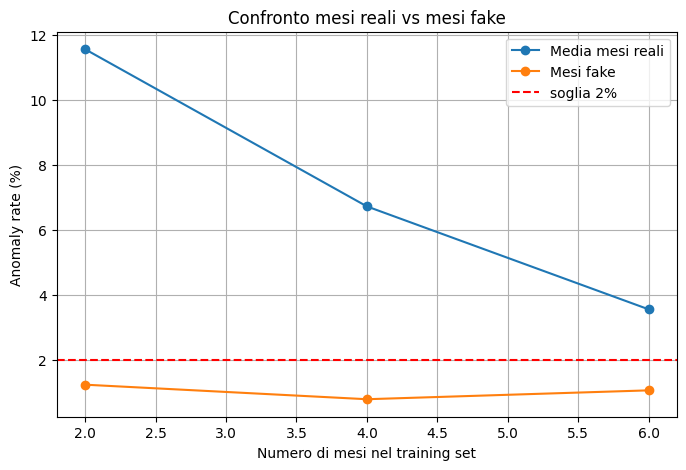

In [ ]:
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
real_mean = real_results_df.groupby("window_size")["anomaly rate"].mean().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])

plt.figure(figsize=(8,5))
plt.plot(real_mean["window_size"], real_mean["anomaly rate"]*100, "o-", label="Media mesi reali")
plt.plot(fake_results_df["window_size"], fake_results_df["anomaly"]*100, "o-", label="Mesi fake")
plt.axhline(2, color="r", linestyle="--", label="soglia 2%")
plt.xlabel("Numero di mesi nel training set")
plt.ylabel("Anomaly rate (%)")
plt.title("Confronto mesi reali vs mesi fake")
plt.legend()
plt.grid(True)

plt.show()

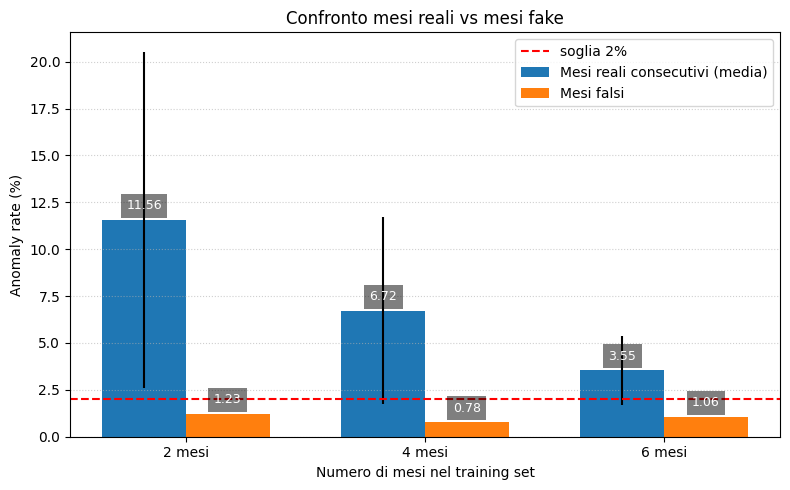

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
real_mean = real_results_df.groupby("window_size")["anomaly rate"].mean().reset_index()
real_std = real_results_df.groupby("window_size")["anomaly rate"].std().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])

x = np.arange(len(labels))
w = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - w/2, real_mean["anomaly rate"]*100, w, yerr= real_std["anomaly rate"]*100, label="Mesi reali consecutivi (media)")
bars2 = ax.bar(x + w/2, fake_results_df["anomaly"]*100, w, label="Mesi falsi")
ax.axhline(2, color="r", linestyle="--", label="soglia 2%")
ax.set_xlabel("Numero di mesi nel training set")
ax.set_ylabel("Anomaly rate (%)")
ax.set_title("Confronto mesi reali vs mesi fake")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.4,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

# Finestre temporali con temperatura

In [ ]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

end = "2025-01-01"
new_df = df_temp[(df_temp["timestamp"] < end)]

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 2
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

          train_months  anomaly rate
0   [2024-01, 2024-02]      0.631847
1   [2024-02, 2024-03]      0.586015
2   [2024-03, 2024-04]      0.345987
3   [2024-04, 2024-05]      0.183514
4   [2024-05, 2024-06]      0.162038
5   [2024-06, 2024-07]      0.470431
6   [2024-07, 2024-08]      0.698487
7   [2024-08, 2024-09]      0.461834
8   [2024-09, 2024-10]      0.368569
9   [2024-10, 2024-11]      0.242033
10  [2024-11, 2024-12]      0.334191


In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 4
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

                           train_months  anomaly rate
0  [2024-01, 2024-02, 2024-03, 2024-04]      0.463136
1  [2024-02, 2024-03, 2024-04, 2024-05]      0.222415
2  [2024-03, 2024-04, 2024-05, 2024-06]      0.070654
3  [2024-04, 2024-05, 2024-06, 2024-07]      0.046103
4  [2024-05, 2024-06, 2024-07, 2024-08]      0.159536
5  [2024-06, 2024-07, 2024-08, 2024-09]      0.571179
6  [2024-07, 2024-08, 2024-09, 2024-10]      0.412373
7  [2024-08, 2024-09, 2024-10, 2024-11]      0.046787
8  [2024-09, 2024-10, 2024-11, 2024-12]      0.063953


In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 6
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_DBSCAN(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

                                        train_months  anomaly rate
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...      0.090121
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...      0.042385
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...      0.025506
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...      0.046203
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...      0.219201
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...      0.084602
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...      0.015431
